In [23]:
def stock_symbol():
    import pandas as pd

    symbols = ['AAPL', 'AMD', 'AMZN', 'CSCO', 'META', 'MSFT', 'NFLX', 'QCOM', 'SBUX', 'TSLA']

    symbol = input("Please enter one of the following symbols!" + str(symbols) + '\n').upper()

    try:
        df = pd.read_csv('/Users/miked/Downloads/HistoricalData_' + symbol + '.csv')
        df['Symbol'] = symbol
        df['Open'] = df['Open'].str.replace("$", '', regex=True).astype(float)
        df['High'] = df['High'].str.replace("$", '', regex=True).astype(float)
        df['Low'] = df['Low'].str.replace("$", '', regex=True).astype(float)
        df['Close/Last'] = df['Close/Last'].str.replace("$", '', regex=True).astype(float)
        df.rename(columns={'Close/Last': 'Close'}, inplace=True)
        df['Date']= pd.to_datetime(df['Date'])
        
    except FileNotFoundError:
        print("You have entered an invalid symbol! Please try again.")

    return df




In [30]:

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

symbols = ['AAPL', 'AMD', 'AMZN', 'CSCO', 'META', 'MSFT', 'NFLX', 'QCOM', 'SBUX', 'TSLA']

symbol = input("Please enter one of the following symbols!" + str(symbols) + '\n').upper()

years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

year = input("Please enter one of the following years!" + str(years) + '\n')
next_year = int(year) + 1

try:
    df = pd.read_csv('/Users/miked/Downloads/HistoricalData_' + symbol + '.csv')
    df['Open'] = df['Open'].str.replace("$", '', regex=True).astype(float)
    df['High'] = df['High'].str.replace("$", '', regex=True).astype(float)
    df['Low'] = df['Low'].str.replace("$", '', regex=True).astype(float)
    df['Close/Last'] = df['Close/Last'].str.replace("$", '', regex=True).astype(float)
    df.rename(columns={'Close/Last': 'Close'}, inplace=True)
    df['Date']= pd.to_datetime(df['Date'])
    df['Symbol'] = symbol
    

    df = df[(df['Date'] >= str(year) + "-01-01") & (df['Date'] < str(next_year) + "-01-01")]
    print(df)
    
    open_avg = df['Open'].mean()
    close_avg = df["Close"].mean()
    df['Open Avg'] = open_avg
    df["Close Avg"] = close_avg
    
    
    print(open_avg)
    print(close_avg)

except FileNotFoundError:
    print("You have entered an invalid symbol! Please try again.")





           Date    Close    Volume    Open     High      Low Symbol
2200 2013-12-31  39.1950   6015800  39.215  39.3900  39.0050   SBUX
2201 2013-12-30  39.2750   4733486  39.395  39.4150  38.9300   SBUX
2202 2013-12-27  39.2850   4503434  39.645  39.6500  39.2300   SBUX
2203 2013-12-26  39.4400   4391318  39.365  39.5125  39.2195   SBUX
2204 2013-12-24  39.2850   3896612  39.050  39.3750  38.9750   SBUX
...         ...      ...       ...     ...      ...      ...    ...
2447 2013-01-08  27.8100   9605084  27.790  27.8600  27.5355   SBUX
2448 2013-01-07  27.8602   8719146  27.700  27.8950  27.5050   SBUX
2449 2013-01-04  27.8450  10911338  27.765  28.0000  27.6550   SBUX
2450 2013-01-03  27.6850  14669782  27.535  27.8050  27.5000   SBUX
2451 2013-01-02  27.5000  13261930  27.295  27.5000  27.1300   SBUX

[252 rows x 7 columns]
33.694698412698415
33.71080634920635


In [28]:
def plot_data():
    from os import major


    open = df["Open"]
    close = df["Close"]
    date = df["Date"]

    plt.style.use('seaborn-v0_8-bright')
    plt.figure(figsize= (40, 15))
    plt.plot(date, open)
    #plt.plot(date, df['Open Avg'])
    #plt.plot(date, df["Close Avg"])
    plt.xlabel("Date")
    plt.ylabel("Open/Close")
    plt.grid(visible= major)

    plt.show()



           Date    Close    Volume    Open    High     Low Symbol
0    2022-09-27  84.2800   8628753  85.970  86.500  83.170   SBUX
1    2022-09-26  84.8100   7583548  84.310  86.025  84.280   SBUX
2    2022-09-23  84.1700   7153192  83.900  84.440  83.225   SBUX
3    2022-09-22  84.7000   9953048  88.000  88.020  84.380   SBUX
4    2022-09-21  88.6000   8806754  91.290  91.520  88.570   SBUX
...         ...      ...       ...     ...     ...     ...    ...
2510 2012-10-04  24.5500  24813860  24.945  24.965  24.380   SBUX
2511 2012-10-03  24.7450  15038688  24.825  24.915  24.525   SBUX
2512 2012-10-02  24.6500  21740440  25.220  25.220  24.400   SBUX
2513 2012-10-01  25.0725  15429746  25.465  25.650  24.950   SBUX
2514 2012-09-28  25.3550  16058016  25.280  25.480  24.945   SBUX

[2515 rows x 7 columns]


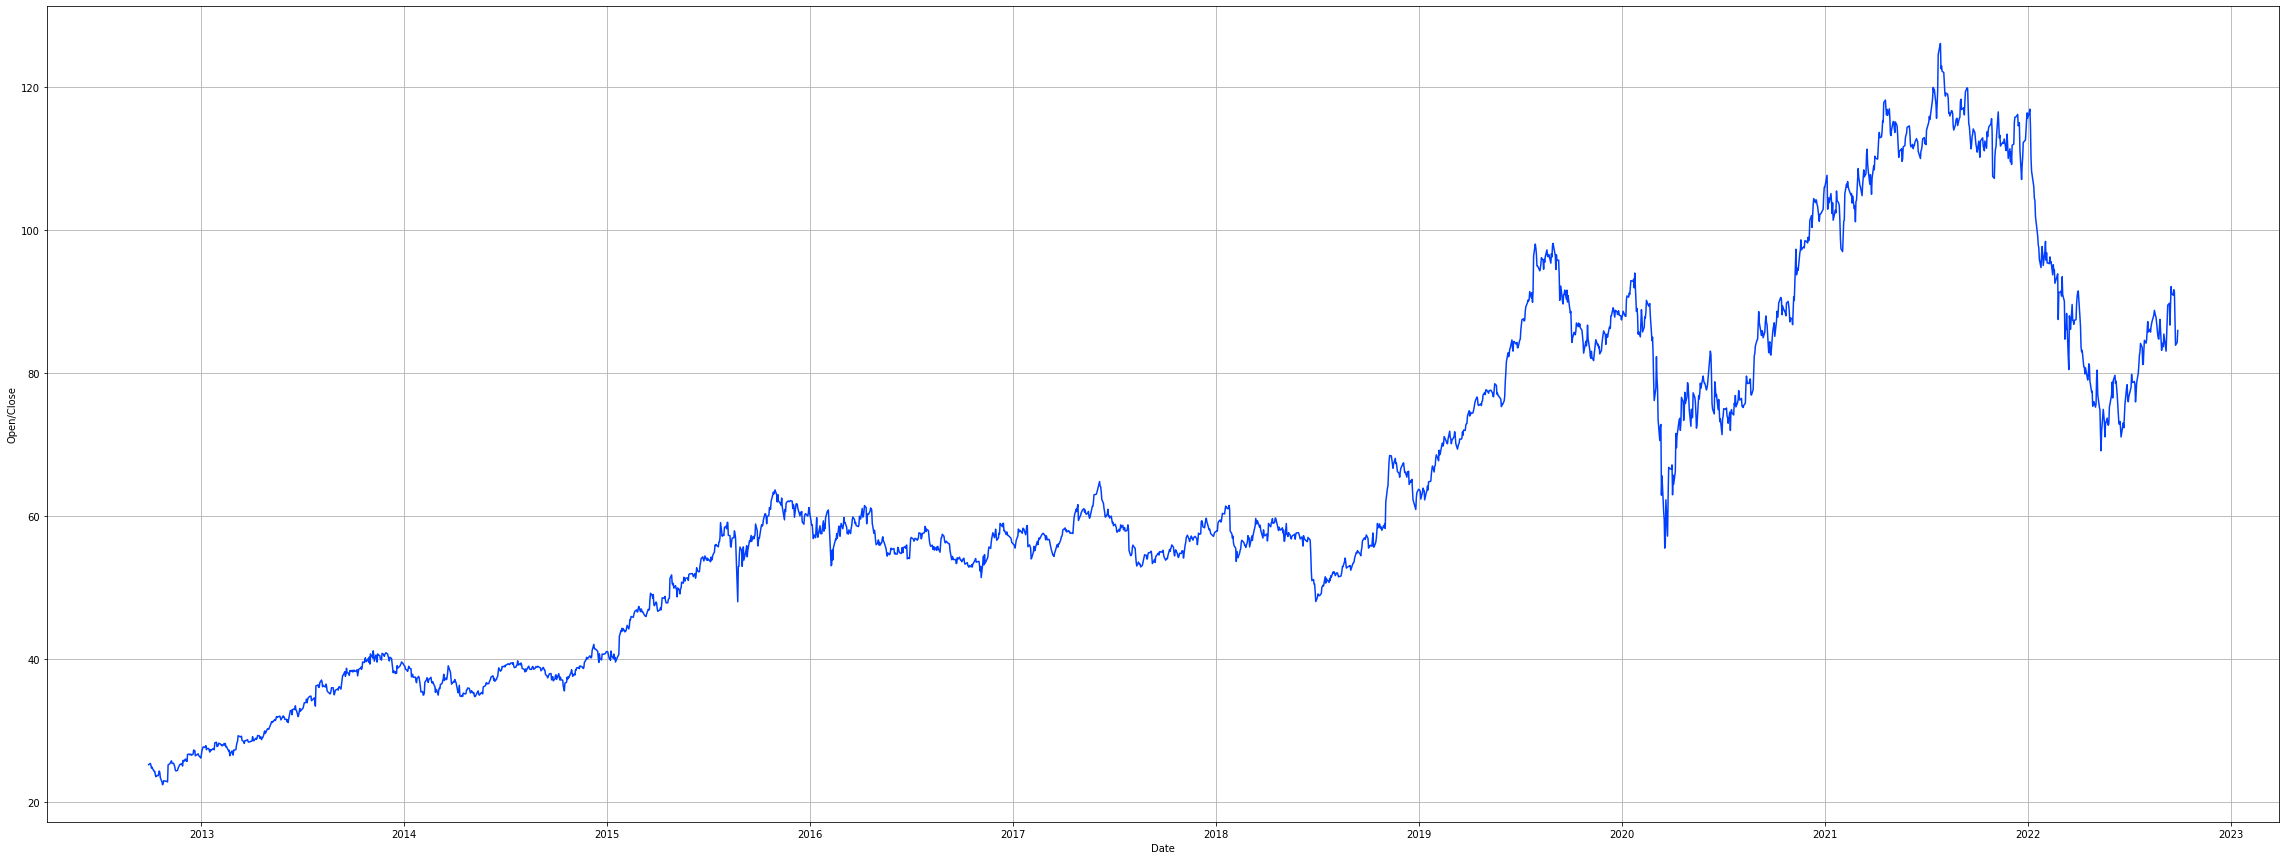

In [31]:
df = stock_symbol()

print(df)

plot_data()